---
## Linear Regression
---
__Introduction to Linear Regression__ [[1]](https://en.wikipedia.org/wiki/Linear_regression)

Consider a set of N-D datapoints and 1-D. In linear regression, the relationship between the dependent and indepedent variables is modeled as linear function of the form:

$y = w \bullet x + b$

where $y$ is the dependent variable (to be predicted) and $x$ is the independent variable.

In [1]:
import time
from IPython import display

# Import the libraries and load the datasets.
import numpy as np
import tensorflow as tf

# Plots.
import matplotlib.pyplot as plt

---
### Linear Regression in Tensorflow
Following are the steps to implement a simple linear regression function in Tensorflow.

_Example: Consider the line `y = 12 * x + 10`_

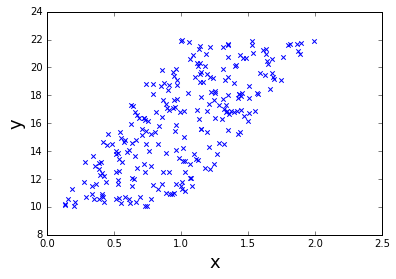

In [2]:
# Generate some random data.
n = 250 # Number of datapoints.
d = 1 # The dimensions of the datapoints.
slope = 12
bias = 10

# Randomly generate input.
sample_x = np.random.rand(n, d)

# Consider the equation of the y = m.x + b
sample_y = slope*sample_x + bias

# NOTE: We do not want a straight line. So add some random noise to the input.
sample_noise = np.random.rand(n, d)
sample_x += sample_noise

# Plot.
plt.scatter(sample_x, sample_y, marker='x')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

__Try__: Change the bias and slope, plot the points.

---
__Step 1__: Create the tensorflow placeholders for the $x$ and $y$ points. Also create a tensorflow variable to store the weights $w$.

Tensorflow defines variables as [[2]](https://www.tensorflow.org/programmers_guide/variables):
>A variable is the best way to represent shared, persistent state manipulated by your program. Variables are manipulated via the `tf.Variable` class. A `tf.Variable` represents a tensor whose value can be changed by running ops on it. Unlike `tf.Tensor` objects, a `tf.Variable` exists outside the context of a single `session.run` call.

We use `tf.get_variable` to create variable instead. It is a wrapper that allows you to automatically add an initializer, a regularizer and many other options [[3]](https://www.tensorflow.org/api_docs/python/tf/get_variable).

In [3]:
# NOTE: The name of the variable is optional.
x = tf.placeholder(tf.float32, shape=(None, 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="Y")
lr_rate = tf.placeholder(tf.float32, shape=(), name="lr")

# Weight & bias.
# w = tf.get_variable(shape=[1], name="w", initializer=tf.zeros_initializer())
# b = tf.get_variable(shape=[1], name="b", initializer=tf.zeros_initializer())

# Initialize with a different value.
w = tf.Variable(np.array([[5.0]]), dtype=tf.float32, name="w")
b = tf.Variable(np.array([[5.0]]), dtype=tf.float32, name="b")

__Step 2__: Once the placeholders & variable have been created, compute the $y$.

In [4]:
# Compute predicted Y.
y_pred = w*x + b

__Step 3__: Once the predicted $y$ has been computed, define the loss between the predicted $y$ and the actual $y$.

The loss can be of various forms. In case of linear regression, we can use the L2-norm or the euclidean distance between the two points.

$Loss(y) = \lVert y - y_{pred} \rVert^2$   

i.e.  

$Loss(y) = \frac{\sum_n(y - y_{pred})^2}{2*n}$

In [5]:
loss = tf.div(tf.reduce_mean(tf.square(y - y_pred)), 2*n)

# This can be done in a single line.
# loss = tf.losses.mean_squared_error(y, y_pred)

__Step 4__: The loss shows how far we are from the actual $y$ value. Use the loss to change the weights by calulating the gradient w.r.t $w$. We use a stochastic gradient descent optimizer for this purpose.

In [6]:
# Create a gradient descent optimizer with the set learning rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr_rate)

# Run the optimizer to minimize loss
# Tensorflow automatically computes the gradients for the loss function!!!
train = optimizer.minimize(loss)

__Step 5__: `train` is the variable that is evaluated when the session is executed. The linear regression functions are now defined. While training `train` is evaluated and while testing or predicting $y$, `y_pred` is evaluated.

Initialize the variables in tensorflow.

In [7]:
# Initialize all variables
init = tf.global_variables_initializer()

__Step 6__: Now we are going to build the model. This is accomplished by evaluating the `train` variable for a set defined number of loops or __epochs__. During each epoch, a sample $x$ is used to compute $y_{pred}$ and iteratively the $w$ is changed while the loss is reduced. Each time a loss is generated, the gradient computed can be used to update $w$, but this gradient is not constant across points (because loss is not constant).

It varies for each $y$ and so only a small portion of the gradient is used to update the $w$ parameter. This helps stabilize the $w$ from "jumping around" a lot while never reaching the steady state.

So how do you define the best learning rate? Trial and Error.

W: 7.67125177383, B: 8.05626583099, Loss: 0.0129069695249
Slope: 12, Bias: 10


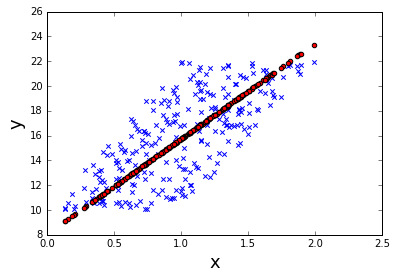

In [8]:
# Define some hyper-parameters.
lr = 0.1
epochs = 5000

# Train the model.
with tf.Session() as sess:
    # Initialize all variables
    sess.run(init)
    
    for epoch in range(epochs):
        y_p, curr_w, curr_b, curr_loss, _ = sess.run([y_pred, w, b, loss, train],
                                                        feed_dict = {x:sample_x, y: sample_y,
                                                                     lr_rate: lr})
        
    print("W: {}, B: {}, Loss: {}".format(curr_w[0][0], curr_b[0][0], curr_loss))
    print("Slope: {}, Bias: {}".format(slope, bias))
    plt.scatter(sample_x, sample_y, marker='x')
    plt.scatter(sample_x, y_p, c='red', marker='o')
    plt.xlabel('x', fontsize=18)
    plt.ylabel('y', fontsize=18)
    plt.show()

---
## Keras Implementation.
Keras is an abstract library built over tensorflow (and other popular libraries such as theano & CNTK). It provides an easier API where users do not have to create variables or perform specific vector operations. Keras provides them in the form of __layers__ that can add either sequentially or in any other combinaton. Also, it provides an easy API to compile the models, save & load the models.

Its API is very similar to scikit-learn where it has a `fit` function to train, `predict` to perform predictions and each function has a host of parameters to validate, perform parallel training and so.

For more information [[4]](https://keras.io/).

__NOTE: In most cases, for applications of deep learning, the standard / hot of the press research methods are quickly integrated into Keras. It has a large community of developers. I recommend its use, unless there are specific kinds of computation you are looking for and cannot find it in Keras.__

So why study Tensorflow then?
__Because, ultimately knowing Tensorflow does help!__

In [9]:
from keras.layers import Dense, Input
from keras.initializers import random_normal
from keras.models import Model
from keras import optimizers, metrics

Using TensorFlow backend.


As seen in the previous section of the notebook, let us breakdown the implementation of the model into a series of steps.

__Step 1__: Create the layers.

* __Dense Layer__: This layer is the equivalent of implementing $w \bullet x + b$ and many more options. This is its simplest case.

* __Input Layer__: This layer simply casts the sample_x values into a Tensor (and validates the shape).

Important to remember that Keras input layer does not have `None`. This is because by default it consider only the shape of a single sample and not the size of the batch. `None` represents any sized batch in Tensorflow.

In [10]:
# Create a layer to take an input.
input_l = Input(shape=np.array([1]))
# Compute Wx + b.
dense = Dense(np.array([1]), activation='linear')
output = dense(input_l)

__Step 2__: Create and compile the model.

In [11]:
# Create a model and compile it.
model = Model(inputs=[input_l], outputs=[output])
model.summary() # Get the summary.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, array([1]))        2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


__Step 3__: Add the optimizer and the loss function. The loss is `mean_squared_error`.

In [12]:
sgd = optimizers.sgd(lr=lr)
model.compile(optimizer=sgd, loss='mean_squared_error')

__That's pretty much it!__
Once the model has been created, use the `fit` function to train and `predict` function to predict.

In [13]:
# Train the model.
model.fit(x=sample_x, y=sample_y, epochs=epochs, verbose=0)

In [14]:
# Predict the y's.
y_p = model.predict(sample_x)
y_p_loss = model.evaluate(sample_x, sample_y)

 32/250 [==>...........................] - ETA: 0s

Evaluation Metrics: ['loss']
W: 6.04618597031, B: 9.90206241608, Loss: 5.95258642578
Slope: 12, Bias: 10


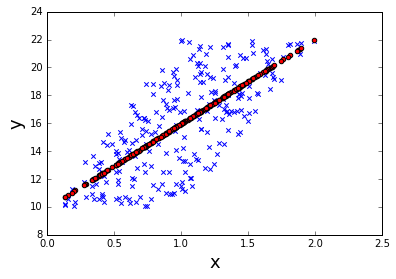

In [15]:
# Plot them.
print("Evaluation Metrics: " + str(model.metrics_names))
print("W: {}, B: {}, Loss: {}".format(dense.get_weights()[0][0][0],
                                      dense.get_weights()[1][0], y_p_loss))
print("Slope: {}, Bias: {}".format(slope, bias))
plt.scatter(sample_x, sample_y, marker='x')
plt.scatter(sample_x, y_p, c='red', marker='o')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()